In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

from scipy.io import arff

In [2]:
data = arff.loadarff('Autism-Child-Data.arff')
df = pd.DataFrame(data[0])

In [3]:
#df.head()

In [4]:
#df.info()

#### Description of features

- A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

- age - Age of the patient in years

- gender - Gender of the patient

- ethnicity - Ethnicity of the patient

- jaundice - Whether the patient had jaundice at the time of birth

- autism - Whether an immediate family member has been diagnosed with autism

- contry_of_res - Country of residence of the patient

- used_app_before - Whether the patient has undergone a screening test before

- result - Score for AQ1-10 screening test

- age_desc - Age of the patient

- relation - Relation of patient who completed the test

- Class/ASD - Classified result as NO or YES

In [5]:
catCols = [col for col in df.columns if df[col].dtype=="O"]
#catCols[:5]

In [6]:
df[catCols]=df[catCols].apply(lambda x: x.str.decode('utf8'))
#df.head()

In [7]:
#Making categorical variables numeric
df['ethnicity'].replace(['Middle Eastern ', 'White-European', 'Black',
       'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino','Others', '?'], [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['gender'].replace(['m','f'],[0,1], inplace=True)
df['jundice'].replace(['no','yes'],[0,1], inplace=True)
df['austim'].replace(['no','yes'],[0,1], inplace=True)
df['Class/ASD'].replace(['NO','YES'],[0,1], inplace=True)

In [8]:
#drop missing values
df=df.dropna()

In [9]:
#drop irrelevant features
X = df.drop(columns=['Class/ASD', 'age_desc', 'used_app_before', 'relation', 'contry_of_res'])
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result
0,1,1,0,0,1,1,0,1,0,0,6.0,0,10,0,0,5.0
1,1,1,0,0,1,1,0,1,0,0,6.0,0,1,0,0,5.0
2,1,1,0,0,0,1,1,1,0,0,6.0,0,11,0,0,5.0
3,0,1,0,0,1,1,0,0,0,1,5.0,1,11,1,0,4.0
4,1,1,1,1,1,1,1,1,1,1,5.0,0,10,1,0,10.0


In [10]:
y = df['Class/ASD'].values

In [11]:
##Split dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [12]:
model_list = ['KNearestNeighbours', 'DecisionTree','RandomForest','Logistic Regression', 'SVC' ]

In [13]:
#KNN 
score=[]
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(kn_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
    
np.array(score)

array([0.99285714])

In [14]:
print(y_pred[:5])
y_test[:5]

[0.33333333 0.         0.16666667 1.         0.33333333]


array([0, 0, 0, 1, 0])

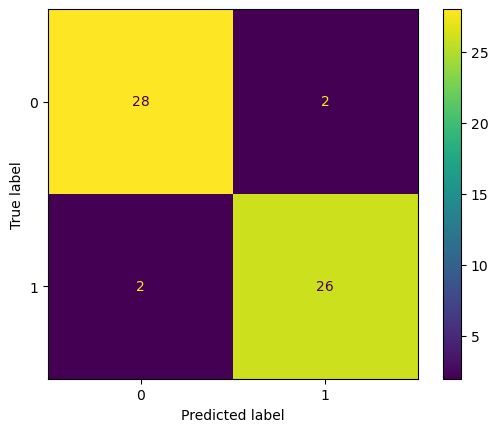

In [15]:
cm = confusion_matrix(y_test, kn_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [16]:
#DT
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
y_pred=pd.DataFrame(dt_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
    
np.array(score)

array([0.99285714, 1.        ])

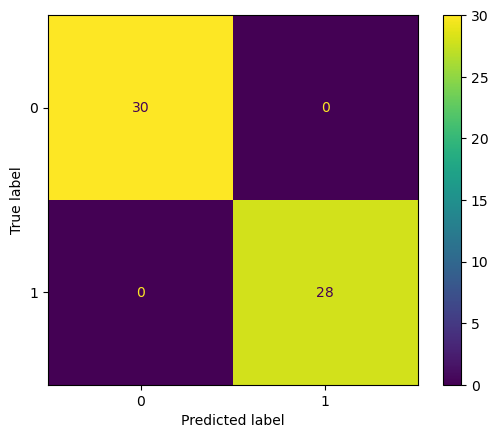

In [17]:
cm = confusion_matrix(y_test, dt_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [18]:
# RF
rf_clf = RandomForestClassifier()      
rf_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(rf_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
    
np.array(score)

array([0.99285714, 1.        , 1.        ])

In [19]:
print(y_pred[:5])
y_test[:5]

[0.05 0.03 0.08 0.85 0.02]


array([0, 0, 0, 1, 0])

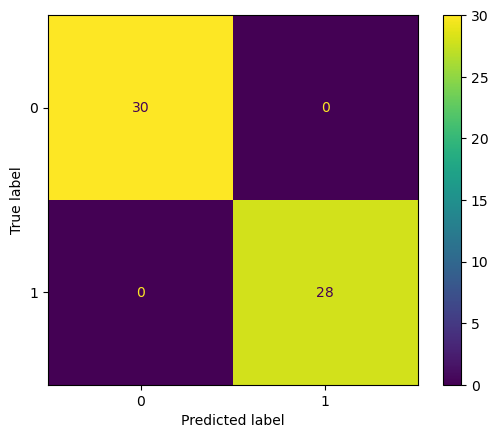

In [20]:
cm = confusion_matrix(y_test, rf_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [21]:
#LR
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(lr_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
    
np.array(score)

array([0.99285714, 1.        , 1.        , 1.        ])

In [22]:
print(y_pred[:5])
y_test[:5]


[0.00240304 0.00186895 0.12735057 0.99673588 0.0773659 ]


array([0, 0, 0, 1, 0])

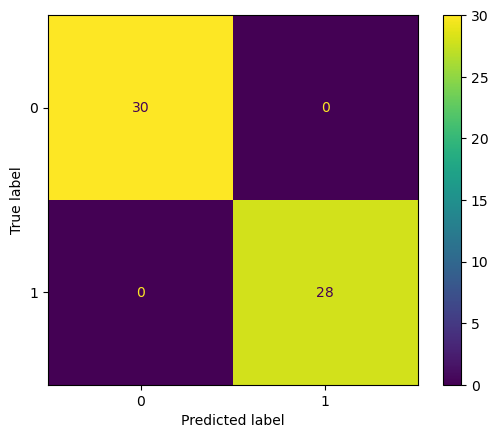

In [23]:
cm = confusion_matrix(y_test, lr_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [24]:
# svc

svc_clf = SVC()
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
score.append(roc_auc_score(y_test,y_pred))
    
np.array(score)

array([0.99285714, 1.        , 1.        , 1.        , 1.        ])

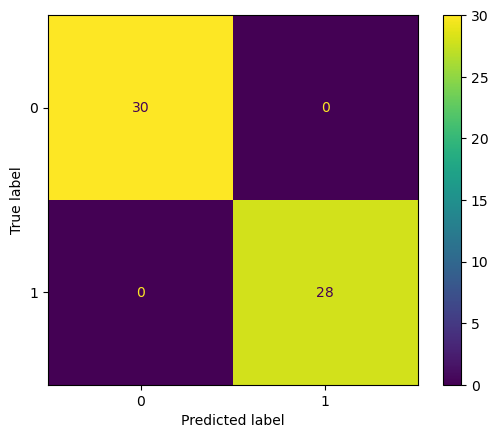

In [25]:
cm = confusion_matrix(y_test, svc_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


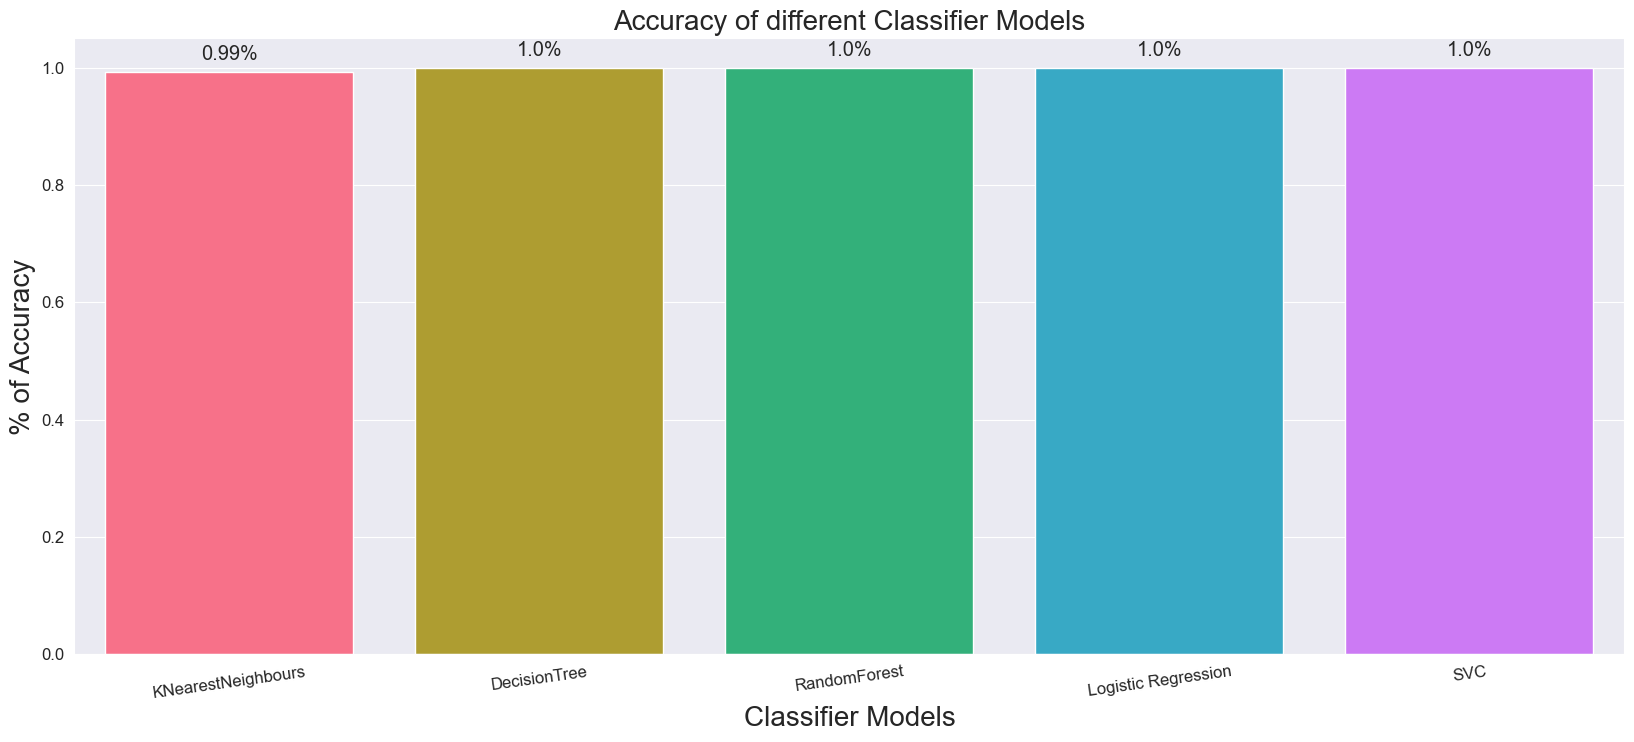

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=score, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()